In [1]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Toy dataset

In [2]:
Train_X = torch.arange(10).to(torch.float32).reshape(10,1)
Train_X_Norm = (Train_X - Train_X.mean())/ Train_X.std()

In [3]:
Train_Y = torch.tensor([1.6, 1.9, 3.7, 2.6, 5.6, 6.9, 7.2, 8.0, 8.6, 9.6])

# Visualize

Text(0, 0.5, '$y$')

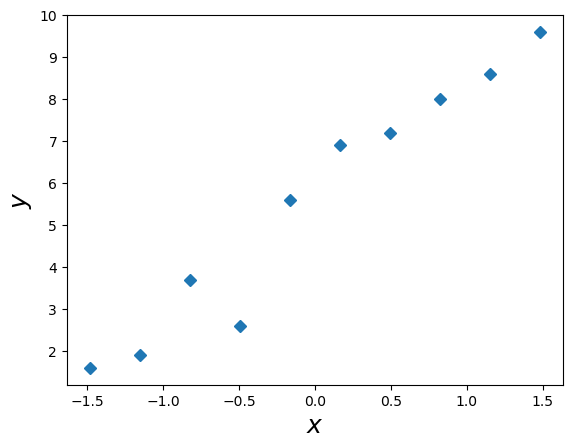

In [4]:
plt.plot(Train_X_Norm, 
         Train_Y,
         linestyle="",
         marker="D")
plt.xlabel("$x$", size=18)
plt.ylabel("$y$", size=18)

# Initialize Dataloader iterator

In [7]:
toy_data = TensorDataset(Train_X_Norm, Train_Y)
toy_data[9]

(tensor([1.4863]), tensor(9.6000))

In [9]:
data = DataLoader(toy_data, batch_size=5)
next(iter(data))

[tensor([[-1.4863],
         [-1.1560],
         [-0.8257],
         [-0.4954],
         [-0.1651]]),
 tensor([1.6000, 1.9000, 3.7000, 2.6000, 5.6000])]

In [10]:
for x,y in data:
    print(x,y)
    print()

tensor([[-1.4863],
        [-1.1560],
        [-0.8257],
        [-0.4954],
        [-0.1651]]) tensor([1.6000, 1.9000, 3.7000, 2.6000, 5.6000])

tensor([[0.1651],
        [0.4954],
        [0.8257],
        [1.1560],
        [1.4863]]) tensor([6.9000, 7.2000, 8.0000, 8.6000, 9.6000])



# Model, Loss function, optimizer function

In [11]:
def loss_func(prediction, label):
    return ((label - prediction).pow(2)).mean()

In [12]:
class Net():
    def __init__(self, in_features):
        self.w =  torch.rand(in_features,1) #torch.tensor([1.0]).reshape(-1,1)#
        self.b =  torch.rand(in_features,1) #torch.tensor([1.0]).reshape(-1,1)#
    def forward(self,x):
        z =  x @ self.w + self.b
        return z

In [15]:
model = Net(1)

In [16]:
model.w, model.b

(tensor([[0.7943]]), tensor([[0.6111]]))

# Train

In [18]:
def train(model, epoch, data):
    lr = 0.01
    for i in range(epoch):
        for x, y in data:
            y = y.reshape(-1,1)
            pred = model.forward(x)
            
            # loss calculated
            loss = loss_func(pred, y)
            
            # gradients to backpropagate
            dw = -torch.sum((y - pred) * x)
            db = -torch.sum((y - pred))
            
            #Update paramters
            model.w = model.w - lr * dw
            model.b  = model.b -  lr * db 
        if i % 10 == 0:
            print(f"Epoch: {i+1}, Error: {loss:.4f}")#", \tgradient_W: {dw:.2f},\t gradient_b: {db:.2f}, \tW: {model.w}, \tb: {model.b}")

In [19]:
train(model, 200, data )

Epoch: 1, Error: 45.6858
Epoch: 11, Error: 6.3871
Epoch: 21, Error: 1.0765
Epoch: 31, Error: 0.3264
Epoch: 41, Error: 0.2105
Epoch: 51, Error: 0.1895
Epoch: 61, Error: 0.1849
Epoch: 71, Error: 0.1836
Epoch: 81, Error: 0.1833
Epoch: 91, Error: 0.1832
Epoch: 101, Error: 0.1831
Epoch: 111, Error: 0.1831
Epoch: 121, Error: 0.1831
Epoch: 131, Error: 0.1831
Epoch: 141, Error: 0.1831
Epoch: 151, Error: 0.1831
Epoch: 161, Error: 0.1831
Epoch: 171, Error: 0.1831
Epoch: 181, Error: 0.1831
Epoch: 191, Error: 0.1831


# To visualize regression line

In [20]:
prediction = model.forward(Train_X_Norm)

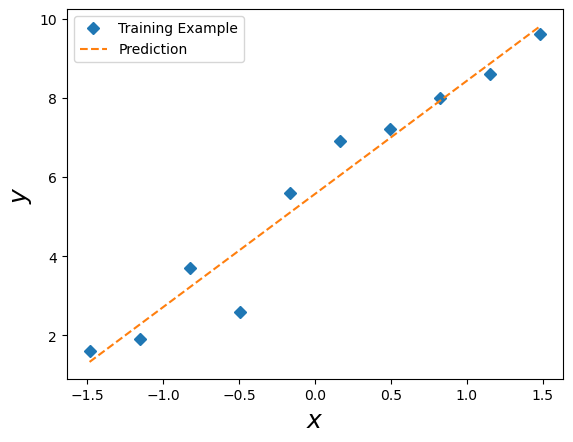

In [21]:
plt.plot(Train_X_Norm,
         Train_Y,
         linestyle="",
         marker="D")

plt.plot(Train_X_Norm,
         prediction,
         linestyle="--")


plt.xlabel("$x$", size=18)
plt.ylabel("$y$", size=18)

plt.legend(['Training Example', 'Prediction'])